# Gradient Descent GIF (Fully Working)

This example shows gradient descent on a 1D quadratic loss, which is the clearest way to understand optimization.


## What the animation shows

• The loss curve

• A moving point representing the current parameter

• Gradient descent steps

• Saved as a GIF

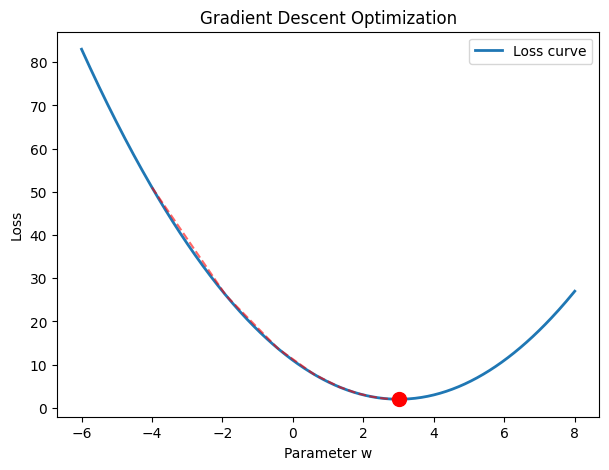

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# ----------------------------------
# Create output folder
# ----------------------------------
os.makedirs("gifs", exist_ok=True)

# ----------------------------------
# Loss and gradient
# ----------------------------------
def loss(w):
    return (w - 3)**2 + 2

def grad(w):
    return 2 * (w - 3)

# ----------------------------------
# Gradient descent
# ----------------------------------
lr = 0.15
epochs = 25
w = -4.0

history = []
for _ in range(epochs):
    history.append(w)
    w -= lr * grad(w)

# ----------------------------------
# Plot setup
# ----------------------------------
w_vals = np.linspace(-6, 8, 400)
loss_vals = loss(w_vals)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(w_vals, loss_vals, label="Loss curve", lw=2)

point, = ax.plot([], [], "ro", markersize=10)
trace, = ax.plot([], [], "r--", alpha=0.6)

ax.set_xlabel("Parameter w")
ax.set_ylabel("Loss")
ax.set_title("Gradient Descent Optimization")
ax.legend()

trace_x, trace_y = [], []

# ----------------------------------
# Save animation
# ----------------------------------
writer = PillowWriter(fps=2)

with writer.saving(fig, "gifs/gradient_descent.gif", dpi=120):
    for w in history:
        y = loss(w)

        trace_x.append(w)
        trace_y.append(y)

        point.set_data([w], [y])        # ✅ FIX
        trace.set_data(trace_x, trace_y)

        writer.grab_frame()

plt.show()
